In [1]:
%matplotlib inline
from collections import defaultdict

import matplotlib.pylab as plt
from skimpy import skim
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns


In [2]:

import tensorflow as tf
import tensorflow_probability as tfp

from bayesianquilts.models import LogisticRelunet
from bayesianquilts.metrics.classification import classification_metrics

2024-01-04 06:15:02.570824: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 06:15:02.596344: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 06:15:02.596369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 06:15:02.597588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 06:15:02.602668: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 06:15:02.603124: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
print(tf.__version__, tfp.__version__)

2.15.0 0.23.0


# Load the dataset

Using the example from here: https://www.tensorflow.org/guide/core/logistic_regression_core

In [4]:
from ucimlrepo import fetch_ucirepo 


In [5]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

In [6]:
X_scaled = (X - X.min())/X.max()
n = X_scaled.shape[0]
p = X_scaled.shape[1]

In [7]:
model = LogisticRelunet(dim_regressors=p, layer_sizes=[50])

In [8]:
batch_size = 1057


In [9]:
tfdata = tf.data.Dataset.from_tensor_slices({'X': X_scaled, 'y':y})

def data_factory():
    out = tfdata.shuffle(batch_size*10).batch(batch_size)
    return out

In [10]:
losses = model.fit(
    data_factory,
    dataset_size=n,
    batches_per_step=1,
    check_every=int(n/batch_size),
    batch_size=batch_size,
    num_steps=4000,
    max_decay_steps=100,
    max_plateau_epochs=100,
    sample_size=32,
    learning_rate=0.001)

Running optimization for 4000 steps of 1 accumulated batches, checking every 240 steps
Saved a checkpoint: /tmp/tfcheckpoints/ff3c8cdf-e321-4415-ad05-6568b7a40049/ff3c8cdf-e321-4415-ad05-6568b7a40049-1


  6%|▌         | 235/4000 [00:06<01:23, 45.28it/s]

Step 240: average-batch loss:386.4664091085089 rel loss: 2.58754700649605e+305
Saved a checkpoint: /tmp/tfcheckpoints/ff3c8cdf-e321-4415-ad05-6568b7a40049/ff3c8cdf-e321-4415-ad05-6568b7a40049-2


 12%|█▏        | 475/4000 [00:11<01:19, 44.52it/s]

Step 480: average-batch loss:403.44464455890613 rel loss: 0.04208318459391091
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


 18%|█▊        | 715/4000 [00:16<01:13, 44.68it/s]

Step 720: average-batch loss:369.66873911121684 rel loss: 0.04543979033141454
Saved a checkpoint: /tmp/tfcheckpoints/ff3c8cdf-e321-4415-ad05-6568b7a40049/ff3c8cdf-e321-4415-ad05-6568b7a40049-3


 24%|██▍       | 955/4000 [00:22<01:10, 42.90it/s]

Step 960: average-batch loss:326.7931601984927 rel loss: 0.1312009678742409
Saved a checkpoint: /tmp/tfcheckpoints/ff3c8cdf-e321-4415-ad05-6568b7a40049/ff3c8cdf-e321-4415-ad05-6568b7a40049-4


 30%|██▉       | 1195/4000 [00:27<01:02, 44.61it/s]

Step 1200: average-batch loss:383.70187506932916 rel loss: 0.14831492512397518
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


 36%|███▌      | 1435/4000 [00:33<00:59, 43.41it/s]

Step 1440: average-batch loss:370.92380427626654 rel loss: 0.11897495811540046
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


 42%|████▏     | 1675/4000 [00:38<00:53, 43.69it/s]

Step 1680: average-batch loss:382.6549193166028 rel loss: 0.14598468828749303
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


 48%|████▊     | 1915/4000 [00:44<00:47, 43.98it/s]

Step 1920: average-batch loss:352.04651321301674 rel loss: 0.07173300136974707
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>


 54%|█████▍    | 2155/4000 [00:49<00:42, 43.82it/s]

Step 2160: average-batch loss:362.5675908217413 rel loss: 0.09866968678079477
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


 60%|█████▉    | 2395/4000 [00:55<00:36, 43.72it/s]

Step 2400: average-batch loss:369.6509107727002 rel loss: 0.1159411469719355
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


 66%|██████▌   | 2635/4000 [01:00<00:30, 44.57it/s]

Step 2640: average-batch loss:375.76539774328444 rel loss: 0.1303266288990467
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


 72%|███████▏  | 2875/4000 [01:06<00:25, 44.11it/s]

Step 2880: average-batch loss:373.99358728725105 rel loss: 0.12620651447829603
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


 78%|███████▊  | 3115/4000 [01:11<00:20, 44.19it/s]

Step 3120: average-batch loss:342.0042648262223 rel loss: 0.04447635948475257
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


 84%|████████▍ | 3355/4000 [01:16<00:14, 43.99it/s]

Step 3360: average-batch loss:371.9065654338316 rel loss: 0.12130306218905751
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


 90%|████████▉ | 3595/4000 [01:22<00:09, 44.65it/s]

Step 3600: average-batch loss:386.6048567467332 rel loss: 0.15471015302692753
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


 96%|█████████▌| 3835/4000 [01:27<00:03, 44.19it/s]

Step 3840: average-batch loss:362.23427613492925 rel loss: 0.09784031570561533
New learning rate: <tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
We are in a loss plateau
Restoring from a checkpoint


100%|██████████| 4000/4000 [01:31<00:00, 44.27it/s]

Terminating because we are out of iterations


100%|██████████| 4000/4000 [01:31<00:00, 43.73it/s]


# Compute LOO AU ROC/PRC

In [11]:


def prediction_fn(data):
    params = model.sample(100)
    mu = model.predictive_distribution(data, **params)['logits']
    mu = mu[..., 1] - mu[..., 0]
    sigma = tf.math.sigmoid(mu)
    pred = tf.reduce_mean(sigma, axis=0)
    return pred

bench = classification_metrics(
    data_factory=data_factory,
    prediction_fn=prediction_fn,
    outcome_label='y',
    by_vars=[]
)

(0.0, 1.0)

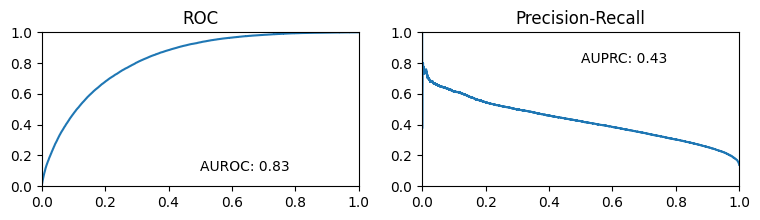

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(9, 2))
ax[0].plot(bench['auroc']['fpr'], bench['auroc']['tpr'])
ax[0].text(0.5, 0.1, f"AUROC: {round(bench['auroc']['auroc'], 2)}")
ax[0].set_xlim((0, 1))
ax[0].set_ylim((0, 1))
ax[0].set_title("ROC")

ax[1].plot(bench['auprc']['recall'], bench['auprc']['precision'])
ax[1].text(0.5, 0.8, f"AUPRC: {round(bench['auprc']['auprc'], 2)}")
ax[1].set_title("Precision-Recall")
ax[1].set_xlim((0, 1))
ax[1].set_ylim((0, 1))

In [13]:
bench['auroc']['auroc']

0.8288385773806547

In [22]:
params = model.sample(10)
params.keys()

dict_keys(['w_1', 'w_0', 'b_1', 'b_0'])

In [63]:
step_size = 1e-4

data = next(iter(data_factory()))
y = tf.cast(tf.squeeze(data['y']), tf.float64)
X = tf.cast(data['X'], tf.float64)
mu = model.eval(X, params)[..., 0]
sigma = tf.math.sigmoid(mu)
nu = (y*(sigma)+(1-y)*(1-sigma))**-1
nu_weights = nu/tf.reduce_sum(nu, axis=0, keepdims=True)
p_loo = tf.reduce_sum(sigma*nu_weights, axis=0)

ll_loo = tf.reduce_sum(nu_weights/nu, axis=0)

z1 = params['w_0'][..., tf.newaxis, :, :]*X[..., tf.newaxis]
z1 = tf.reduce_sum(z1, axis=-2)
az1 = tf.nn.relu(z1)

grad_pre = tf.cast(y, tf.float64)*tf.cast(1-sigma, tf.float64)-tf.cast(1-y, tf.float64)*tf.cast(sigma, tf.float64)
grad_w0 = grad_pre
grad_b0 = grad_pre
grad_w1 = grad_pre[..., tf.newaxis]*tf.nn.relu(z1)
grad_b1 = grad_pre
# compute transformation
w_0 = params['w_0'] - step_size*(1)
b_0 = params['b_0'] - step_size*(1)
w_1 = params['w_1'][..., tf.newaxis, :, :] - step_size*grad_w1[..., tf.newaxis]
b_1 = params['b_1'] - step_size*grad_b1

unorm = tf.cast(az1>0, tf.float64)*tf.math.sqrt(tf.reduce_sum(1 + X*X, axis=-1, keepdims=True))

In [64]:
params['w_0'].shape, w_0.shape

(TensorShape([10, 21, 50]), TensorShape([10, 21, 50]))

In [65]:
params['w_1'].shape, w_1.shape

(TensorShape([10, 50, 1]), TensorShape([10, 1057, 50, 1]))

In [71]:
unorm = tf.cast(az1>0, tf.float64)*tf.math.sqrt(tf.reduce_sum(1 + X*X, axis=-1, keepdims=True))

<tf.Tensor: shape=(10, 1057, 50), dtype=float64, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 5.20694367],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 5.23251658],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 5.27431456],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 5.1518997 , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 5.20694367],
        [0.        , 5.23251658, 0.        , ..., 0.        ,
         0.        , 5.23251658],
        [0.        , 5.43173702, 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 5.27431456, 0.        , ..., 0.

In [58]:
w_1.shape

TensorShape([10, 1057, 50])

In [56]:
grad_w1.shape, w_1.shape

(TensorShape([10, 1057, 50]), TensorShape([10, 50, 1]))